## Indian Air Quality Analysis

### Data Cleaning, EDA, Visualizations and Model Building

####  importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#%matplotlib notebook
#%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [51]:
air = pd.read_csv('C:\\Users\\Admin\\Desktop\\Shrawant\\India Air pollution\\air pollution.csv',encoding = 'unicode_escape')

In [52]:
air.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [53]:
air.shape 

(435742, 13)

### Checking and Removing the null values in the date column 

In [54]:
air = air[air['date'].isna()==False]

In [55]:
air = air.iloc[:435739,:]

### Description of the Data

In [56]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 13 columns):
stn_code                       291661 non-null object
sampling_date                  435735 non-null object
state                          435735 non-null object
location                       435735 non-null object
agency                         286257 non-null object
type                           430345 non-null object
so2                            401092 non-null float64
no2                            419505 non-null float64
rspm                           395516 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408247 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 33.2+ MB


In [57]:
values = air.columns
for i in values:
    print(f'Number of unique values for \033[94m{i}\033[0m: {air[i].nunique()}')

Number of unique values for stn_code: 803
Number of unique values for sampling_date: 5068
Number of unique values for state: 34
Number of unique values for location: 304
Number of unique values for agency: 64
Number of unique values for type: 10
Number of unique values for so2: 4197
Number of unique values for no2: 6864
Number of unique values for rspm: 6065
Number of unique values for spm: 6668
Number of unique values for location_monitoring_station: 991
Number of unique values for pm2_5: 433
Number of unique values for date: 5067


### The correlation plot 

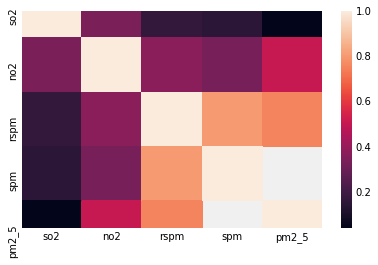

In [58]:
sns.heatmap(air.corr())

### Removing all the duplicates in the dataset 

In [59]:
air.duplicated().sum()
#drop duplicates
air.drop_duplicates(inplace = True)

### Checking for the number of null values in the dataset  

In [60]:
air.isnull().sum()

stn_code                       144074
sampling_date                       0
state                               0
location                            0
agency                         149463
type                             5354
so2                             34629
no2                             16219
rspm                            40032
spm                            236901
location_monitoring_station     27300
pm2_5                          425747
date                                0
dtype: int64

In [61]:
air.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal'], dtype=object)

### Deleting unwanted columns 

In [62]:
del air['sampling_date']
del air['stn_code']
del air['agency']
del air['spm']
del air['location_monitoring_station']
del air['pm2_5']

### Removing the rows which have null values in the rows - so2 and no2 

In [63]:
air = air[air['so2'].isna()==False]
air = air[air['no2'].isna()==False]

In [64]:
air['location'].unique()

array(['Hyderabad', 'Vishakhapatnam', 'Visakhapatnam', 'Tirupati',
       'Vijayawada', 'Patancheru', 'Ramagundam', 'Kurnool', 'Guntur',
       'Nalgonda', 'Nellore', 'Warangal', 'Chittoor', 'Khammam',
       'Kakinada', 'Ananthapur', 'Eluru', 'Kadapa', 'Karimnagar',
       'Nizamabad', 'Ongole', 'Rajahmundry', 'Sangareddy', 'Srikakulam',
       'Vizianagaram', 'Itanagar', 'Naharlagun', 'Guwahati', 'Bongaigaon',
       'Dibrugarh', 'Golaghat', 'Hailakandi', 'Sibsagar', 'Tezpur',
       'Silchar', 'Daranga', 'Lakhimpur', 'Nagaon', 'Nalbari',
       'Sivasagar', 'Silcher', 'Tinsukia', 'Margherita', 'Sindri',
       'Jharia', 'Dhanbad', 'Jamshedpur', 'Patna', 'Chandigarh', 'Korba',
       'Bhilai Nagar', 'Raipur', 'Bhilai', 'Bilaspur', 'Daman',
       'Silvassa', 'Khadoli', 'Daman Diu & Nagar', 'Delhi', 'Ponda',
       'Vasco', 'Panjim', 'Panaji', 'Mormugao', 'Amona', 'Assanora',
       'Bicholim', 'Codli', 'Curchorem', 'Honda', 'Usgao', 'Kundaim',
       'Mapusa', 'Margao', 'Sanguem', 'T

### Checking for the duplicate values 
**Like vishakhapatnam and visakhapatnam and many other values like this which have only spelling mistakes and replacing them.**

In [65]:
air['location'] = air['location'].str.lower()

In [66]:
air["location"] = air["location"].str.replace("vishakhapatnam", "visakhapatnam")
air["location"] = air['location'].str.replace('silchar','silcher')
air["location"] = air['location'].str.replace('bhilai nagar','bhilai')
air["location"] = air['location'].str.replace('panjim','panaji')
air['location'] = air['location'].str.replace('anklesvar','ankleshwar')
air['location'] = air['location'].str.replace('yamuna nagar','yamunanagar')
air['location'] = air['location'].str.replace('kotttayam','kottayam')
air['location'] = air['location'].str.replace('trivendrum','trivandrum')
air['location'] = air['location'].str.replace('chandrpur','chandrapur')
air['location'] = air['location'].str.replace('bhubaneswar','bhubaneshwar')
air['location'] = air['location'].str.replace('pondicherry','pondichery')
air['location'] = air['location'].str.replace('dera baba','dera baba nanak')
air['location'] = air['location'].str.replace('turicorin','tuticorin')
air['location'] = air['location'].str.replace('noida, ghaziabad','noida')

### We have many redundant values that we want to remove 

In [67]:
air['type']

0         Residential, Rural and other Areas
1                            Industrial Area
2         Residential, Rural and other Areas
3         Residential, Rural and other Areas
4                            Industrial Area
                         ...                
435734                                 RIRUO
435735                                 RIRUO
435736                                 RIRUO
435737                                 RIRUO
435738                                 RIRUO
Name: type, Length: 435061, dtype: object

In [68]:
air['type'] = air['type'].str.replace(',' , '') 
air['type'] = air['type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
air['type'].value_counts()

Areas Residential Rural and other    178607
Area Industrial                       95986
Residential and others                86791
Areas Industrial                      51747
Area Sensitive                         8855
Areas Sensitive                        5536
nan                                    5354
RIRUO                                  1304
Sensitive                               490
Industrial                              233
Residential                             158
Name: type, dtype: int64

In [69]:
air["type"]= air["type"].str.replace("Areas Residential Rural and other", "Residential Rural", case = False)
air["type"]= air["type"].str.replace("Residential and others", "Residential Urban", case = False)
air.loc[air['type'].str.contains('Residential'), 'type'] = 'Residential'
air.loc[air['type'].str.contains('Area Industrial'), 'type'] = 'Industrial'
air.loc[air['type'].str.contains('Areas Industrial'), 'type'] = 'Industrial'
air.loc[air['type'].str.contains('Area Sensitive'), 'type'] = 'Sensitive'
air.loc[air['type'].str.contains('Areas Sensitive'), 'type'] = 'Sensitive'
air.loc[air['type'].str.contains('Sensitive'), 'type'] = 'Sensitive'
air.loc[air['type'].str.contains('RIRUO'), 'type'] = 'Others'
air.loc[air['type'].str.contains('nan'), 'type'] = 'Others'


In [70]:
air['type'].unique()

array(['Residential', 'Industrial', 'Others', 'Sensitive'], dtype=object)

### Area wise distrubutions

Text(-15.075, 0.5, 'Number of recorded values')

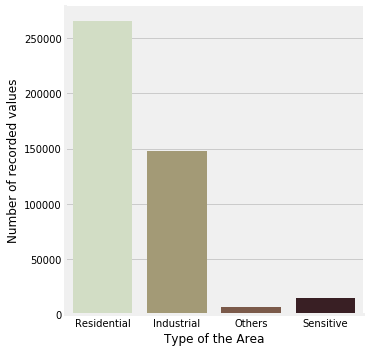

In [71]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.65", data = air)
plt.xlabel('Type of the Area')
plt.ylabel('Number of recorded values')

**NOTE** Industrail Areas have the Highesh number of obervations recorded across all the 

In [72]:
air.head()

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,hyderabad,Residential,4.8,17.4,NaN,01-02-1990
1,Andhra Pradesh,hyderabad,Industrial,3.1,7.0,NaN,01-02-1990
2,Andhra Pradesh,hyderabad,Residential,6.2,28.5,NaN,01-02-1990
3,Andhra Pradesh,hyderabad,Residential,6.3,14.7,NaN,01-03-1990
4,Andhra Pradesh,hyderabad,Industrial,4.7,7.5,NaN,01-03-1990


### SO2, NO2,RSPM  Vs State 

Text(-82.315, 0.5, 'States')

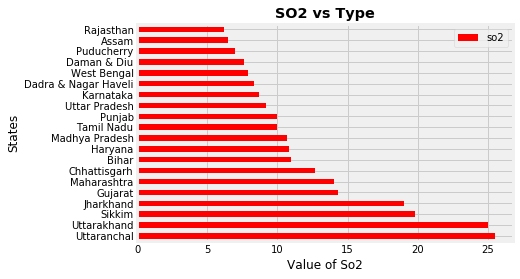

In [73]:
air[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).head(20).plot.barh(color = 'r')
plt.savefig('books_read.png')
plt.title('SO2 vs Type', weight = 'bold')
plt.xlabel('Value of So2')
plt.ylabel('States')

**NOTE**
- **Rajasthan** record the **least** value of rspm observations.
- **Uttaranchal** records the **highest** value of rspm observations.

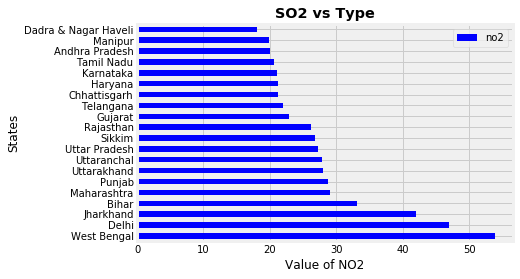

In [74]:
air[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(20).plot.barh(color='b')
plt.title('SO2 vs Type', weight = 'bold')
plt.xlabel('Value of NO2')
plt.ylabel('States')
plt.show()

**NOTE**
- **Chandigarh** record the **least** value of rspm observations.
- **West Bengal** records the **highest** value of rspm observations.

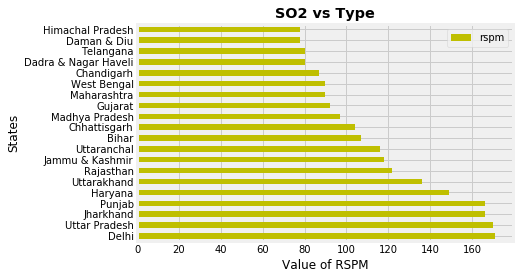

In [75]:
air[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(20).plot.barh(color='y')
plt.title('SO2 vs Type', weight = 'bold')
plt.xlabel('Value of RSPM')
plt.ylabel('States')
plt.show()

**NOTE**
- **Dadar and Nagar Haveli** record the **least** value of rspm observations.
- **Delhi** records the **highest** value of rspm observations.

### SO2, NO2,RSPM Vs Type of area

In [76]:
air['type'].value_counts()

Residential    265556
Industrial     147966
Sensitive       14881
Others           6658
Name: type, dtype: int64

In [82]:
air['so2'].value_counts()

2.000000      45495
5.000000      20125
6.000000      19421
4.000000      17881
7.000000      17486
              ...  
328.000000        1
1.520000          1
68.800000         1
11.433333         1
1.440000          1
Name: so2, Length: 4197, dtype: int64

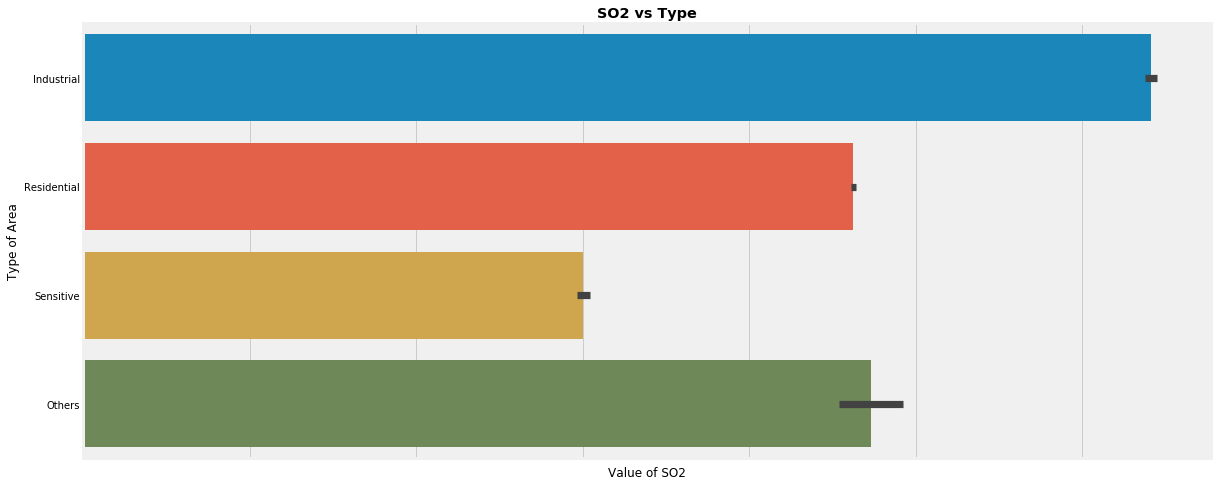

In [148]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.barplot(x=air["so2"], y=air["type"], data=air)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('SO2 vs Type', weight = 'bold')
plt.xlabel('Value of SO2')
plt.ylabel('Type of Area')
plt.show()

**NOTE** The Industrial Areas record the highest number of SO2 observations

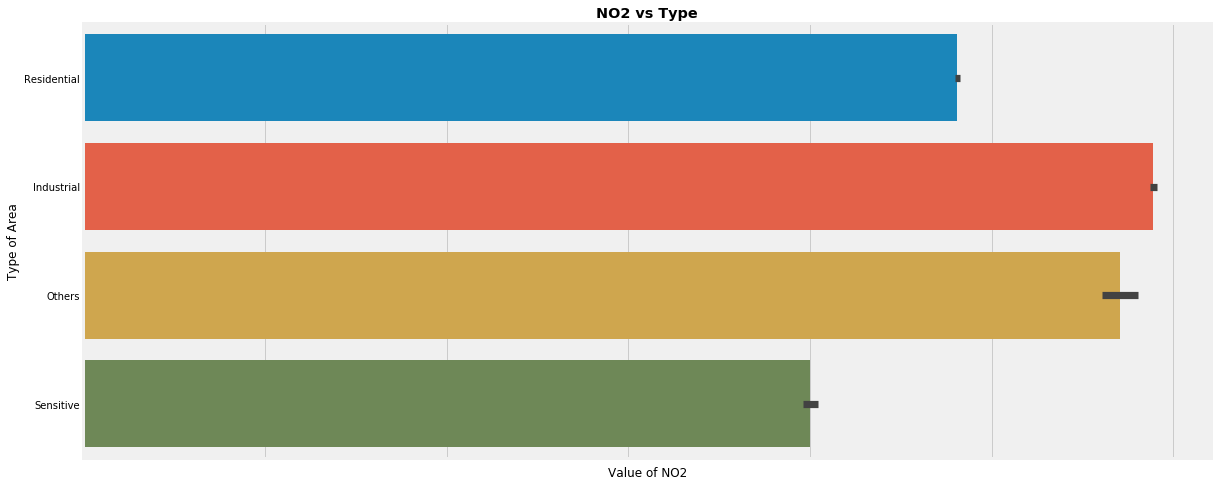

In [84]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.barplot(x=air["no2"], y=air["type"], data=air)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('NO2 vs Type', weight = 'bold')
plt.xlabel('Value of NO2')
plt.ylabel('Type of Area')
plt.show()

**NOTE** The Industrial Areas record the highest number of NO2 observations

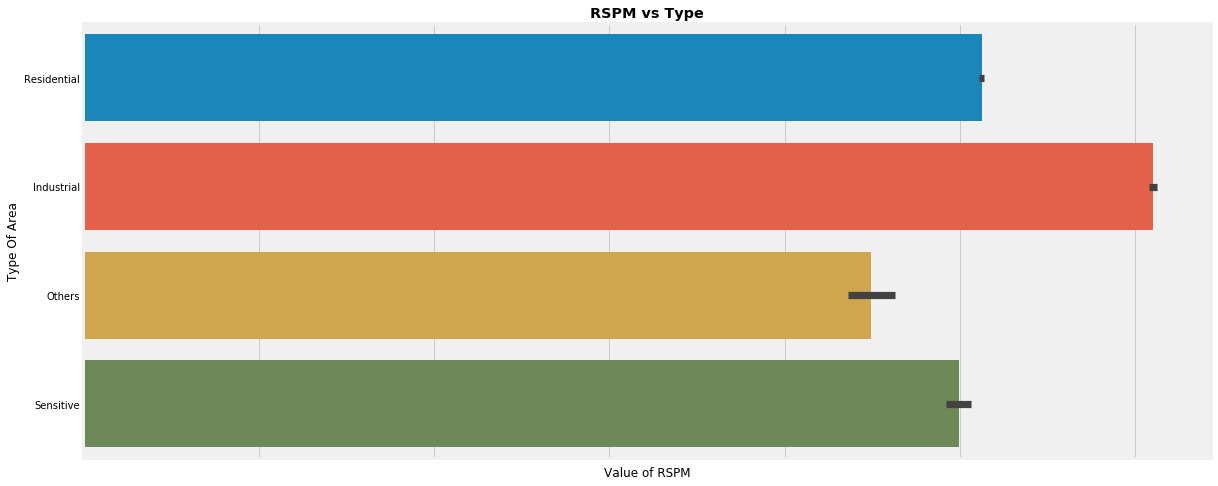

In [85]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.barplot(x=air["rspm"], y=air["type"], data=air)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('RSPM vs Type', weight = 'bold')
plt.xlabel('Value of RSPM')
plt.ylabel('Type Of Area')
plt.show()

**NOTE** The Industrial Areas record the highest number of RSPM observations

## Calculation of Air Quality Index 

### Function to calculate SO2 individual pollutant index(si)

In [86]:

def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
air['si']=air['so2'].apply(calculate_si)
so2 = air[['so2','si']]
so2.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


### Function to calculate NO2 individual pollutant index(ni)

In [87]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
air['ni']=air['no2'].apply(calculate_ni)
no2= air[['no2','ni']]
no2.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [88]:
air['rspm'].isna().sum()

40032

In [89]:
air = air[air['rspm'].isna()== False]

### Function to calculate RSPM individual pollutant index(rpi)

In [90]:
def calculate_rpi(rspm):
    rpi=0
    if(rspm<=30):
        rpi=rspm*50/30
    elif(rspm>30 and rspm<=60): 
        rpi=50+(rspm-30)*50/30
    elif(rspm>60 and rspm<=90):
        rpi=100+(rspm-60)*100/30
    elif(rspm>90 and rspm<=120):
        rpi=200+(rspm-90)*100/30
    elif(rspm>120 and rspm<=250):
        rpi=300+(rspm-120)*(100/130)
    else:
        rpi=400+(rspm-250)*(100/130)
    return rpi 
air['rpi']= air['rspm'].apply(calculate_rpi)
rspm1 = air[['rspm','rpi']]
rspm1.head()

,rspm,rpi
1036,143.7,318.230769
1037,124.7,303.615385
1038,88.0,193.333333
1039,82.7,175.666667
1040,122.3,301.769231


### Function to calculate AQI individual pollutant index(aqi)

In [91]:
def calculate_aqi(si,ni,rpi):
    aqi=0
    if(si>ni and si>ni and si>rpi):
        aqi=si
    if(ni>si and ni>si and ni>rpi):
        aqi=ni
    if(rpi>si and rpi>ni and rpi>si):
        aqi=rpi
    return aqi
air['AQI']=air.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['rpi']),axis=1)
final= air[['date','location','type','si','ni','rpi','AQI']]
final.head()

,date,location,type,si,ni,rpi,AQI
1036,01-02-2004,hyderabad,Industrial,16.125,69.750,318.230769,318.230769
1037,01-05-2004,hyderabad,Industrial,13.000,61.125,303.615385,303.615385
1038,01-09-2004,hyderabad,Industrial,9.500,62.625,193.333333,193.333333
1039,01-12-2004,hyderabad,Industrial,9.125,60.625,175.666667,175.666667
1040,16-01-2004,hyderabad,Industrial,8.500,130.300,301.769231,301.769231


## Time Series Analysis

In [92]:
air = air.iloc[:435739,:]

In [93]:
air.head()

,state,location,type,so2,no2,rspm,date,si,ni,rpi,AQI
1036,Andhra Pradesh,hyderabad,Industrial,12.9,55.8,143.7,01-02-2004,16.125,69.750,318.230769,318.230769
1037,Andhra Pradesh,hyderabad,Industrial,10.4,48.9,124.7,01-05-2004,13.000,61.125,303.615385,303.615385
1038,Andhra Pradesh,hyderabad,Industrial,7.6,50.1,88.0,01-09-2004,9.500,62.625,193.333333,193.333333
1039,Andhra Pradesh,hyderabad,Industrial,7.3,48.5,82.7,01-12-2004,9.125,60.625,175.666667,175.666667
1040,Andhra Pradesh,hyderabad,Industrial,6.8,110.3,122.3,16-01-2004,8.500,130.300,301.769231,301.769231


In [94]:
air['date'] =  pd.to_datetime(air['date'])

In [95]:
aqi = pd.DataFrame(columns=['date', 'AQI','location'])

In [96]:
aqi['date'] = air['date']
aqi['AQI'] = air['AQI']
aqi['location'] = air['location']

In [97]:
qseries = aqi[aqi['date'] > '2004-1-1']

In [98]:
qseries.head()

,date,AQI,location
1036,2004-01-02,318.230769,hyderabad
1037,2004-01-05,303.615385,hyderabad
1038,2004-01-09,193.333333,hyderabad
1039,2004-01-12,175.666667,hyderabad
1040,2004-01-16,301.769231,hyderabad


In [99]:
x = qseries.copy()

In [100]:
qseries = qseries.set_index('date')

### Checking for Outliers 

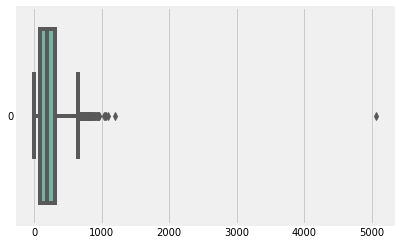

In [101]:
fig, axs = plt.subplots()
sns.boxplot(data=qseries['AQI'],orient='h',palette="Set2")
plt.show()

**Note** Clearly there are outliers and we have to remove them 

In [102]:
q75, q25 = np.percentile(qseries['AQI'], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
upper = q75 + (1.5*iqr)
print("Upper",upper)
lower = q75 - (1.5*iqr)
print("Lower",lower)

IQR 225.38461538461536
Upper 653.4615384615383
Lower -22.69230769230768


#### Replacing with upper whisker 

In [103]:
qseries['AQI'] = qseries['AQI'].clip(upper=upper)

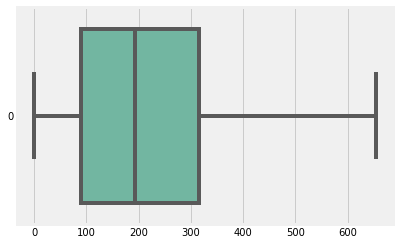

In [104]:
fig, axs = plt.subplots()
sns.boxplot(data=qseries['AQI'],orient='h',palette="Set2")
plt.show()

In [105]:
qseries = qseries['AQI'].resample('MS').mean()

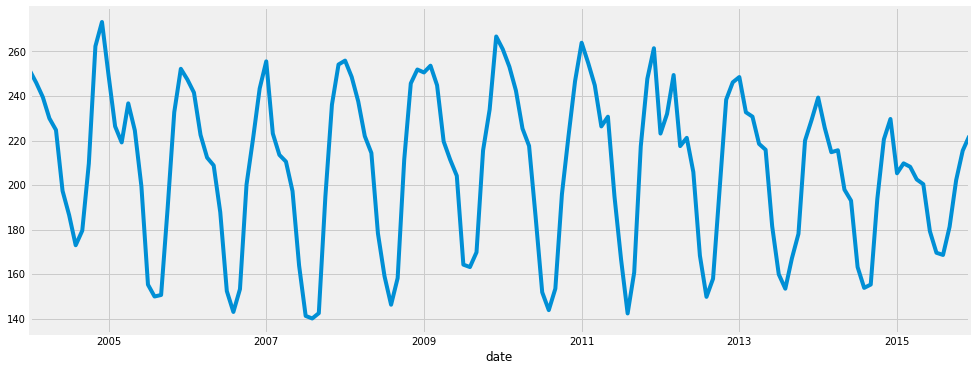

In [106]:
qseries.plot(figsize=(15, 6))
plt.show()

### Decomposition charts 

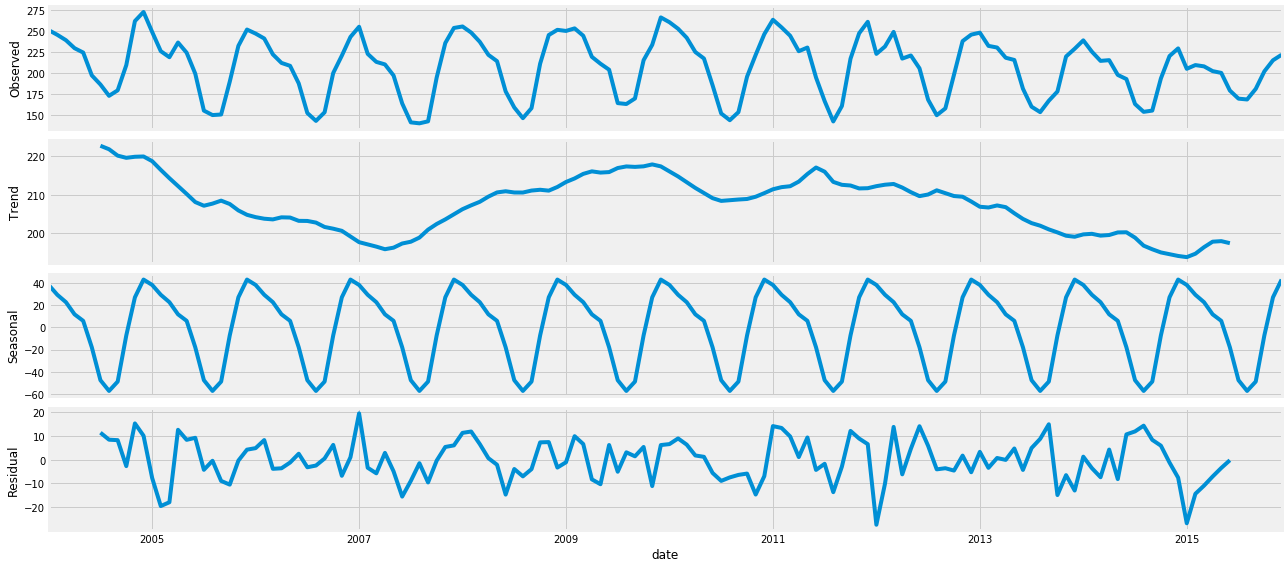

In [107]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(qseries,model='additive')
fig = decomposition.plot()
plt.show()

## Model fitting - ARIMA

In [108]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [109]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(qseries,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1937.6692144538843
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1635.359826508687
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1072.2881201174287
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:953.4378428553649
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1075.7359079467155
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1057.8137037104057
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:963.7254150133192
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:952.7021861142741
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1741.4100891092212
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1464.0292485461778
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1039.673160163175
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:915.7841993795296
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1053.4893750731726
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1046.906055528017
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:939.5039262131937
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:916.5363238078864
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1288.4112006631258
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1120.5734767011336
A

we got least AIC here at the values of SARIMA ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:902.4038726467606

In [110]:
mod = sm.tsa.statespace.SARIMAX(qseries,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4900      0.116      4.212      0.000       0.262       0.718
ma.L1         -0.8982      0.067    -13.310      0.000      -1.030      -0.766
ma.S.L12      -0.7463      0.111     -6.713      0.000      -0.964      -0.528
sigma2       112.9423     13.636      8.282      0.000      86.215     139.669


### Diagnostics

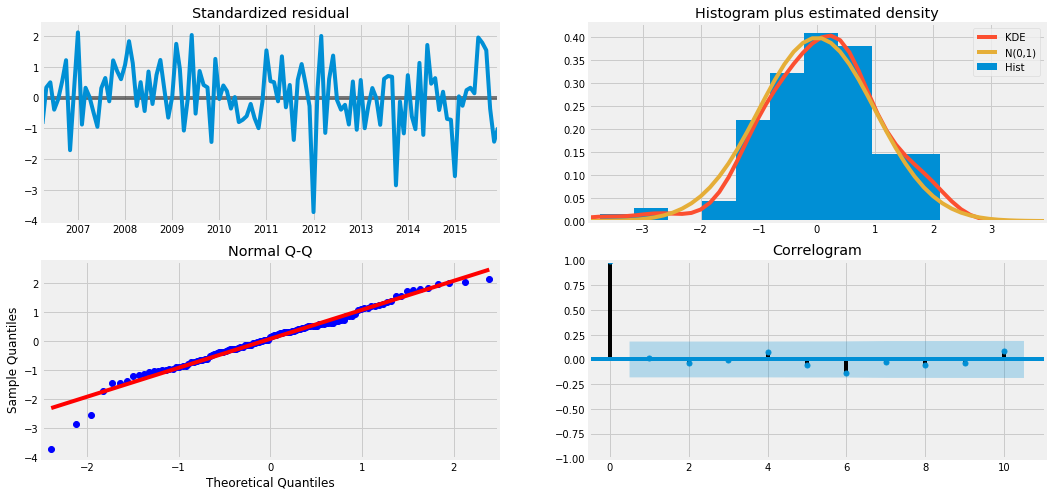

In [111]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Prediction of Air Quality Data 

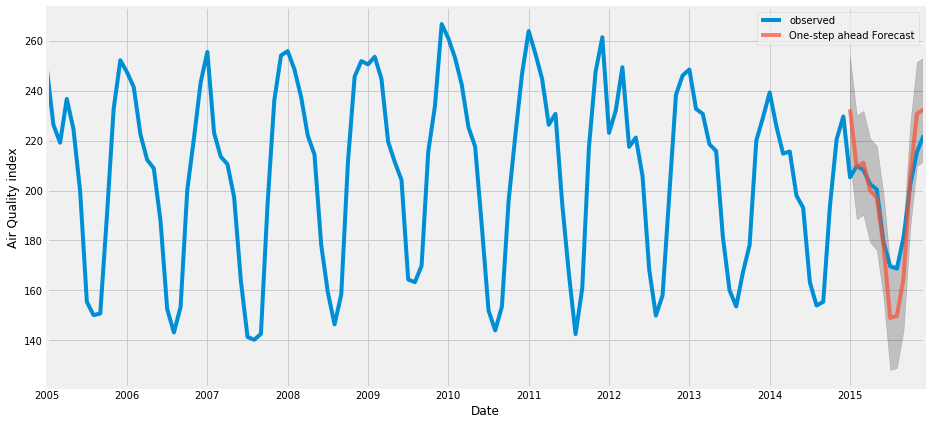

In [112]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = qseries['2005':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Air Quality index')
plt.legend()
plt.show()

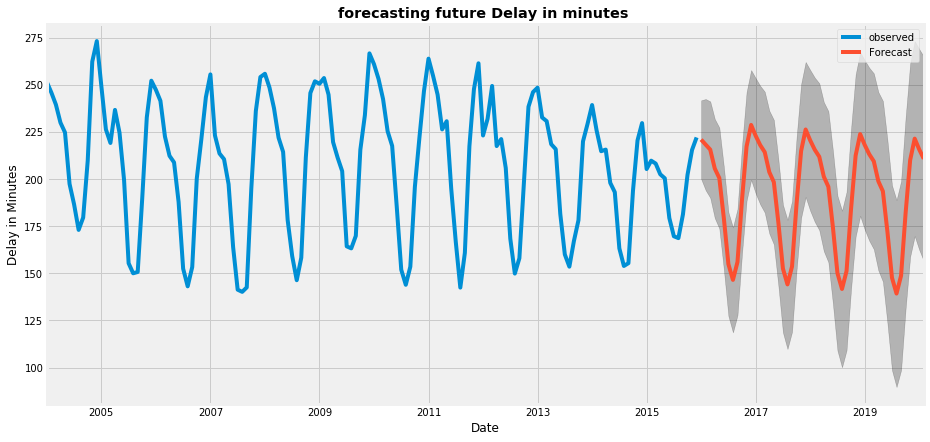

In [113]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = qseries.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title("forecasting future Delay in minutes ",weight  = 'bold')
ax.set_xlabel('Date')
ax.set_ylabel('Delay in Minutes')
plt.legend()
plt.show()

In [114]:
qseries.to_csv('dashboard.csv')

In [115]:
y_forecasted = pred.predicted_mean
y_truth = qseries['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 181.92


In [116]:
def mean_absolute_percentage_error(y_forecasted , y_truth): 
    y_true, y_pred = np.array(y_forecasted), np.array(y_truth)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [117]:
p = mean_absolute_percentage_error(y_forecasted , y_truth)
print("The mean absolute percentage error is",p)

The mean absolute percentage error is 5.546082815965555


### Predicted and Actual values

In [118]:
output = pd.DataFrame({'actual':y_truth,'predicted':y_forecasted})
#Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })

In [119]:
print('forecasted values of Monthly Average predicted values')
final=pd.DataFrame(pred_uc.predicted_mean)
final=final.reset_index()
final.columns = ['Date','Predicted monthly average']
final.head()

forecasted values of Monthly Average predicted values


,Date,Predicted monthly average
0,2016-01-01,220.965012
1,2016-02-01,218.281828
2,2016-03-01,215.655492
3,2016-04-01,205.625212
4,2016-05-01,200.560459


In [120]:
output.tail()

,actual,predicted
date,,
2015-08-01,168.678650,149.735338
2015-09-01,181.322198,164.963625
2015-10-01,202.255415,206.108547
2015-11-01,215.495843,230.772976
2015-12-01,222.101621,232.529252


In [121]:
output.to_csv("predicted.csv")

## STATE_WISE 

In [176]:
 air['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal'], dtype=object)

In [177]:
states = air['state'].unique()

In [178]:
#create unique list of names
states = air.state.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in states}

for key in DataFrameDict.keys():
    DataFrameDict[key] = air[:][air.state == key]

In [179]:
andhra = air[air['state']=="Andhra Pradesh"]

In [180]:
qseries1 = andhra[andhra['date'] > '2004-1-1']

In [181]:
qseries1 = qseries1.set_index('date')

In [182]:
qseries1.head()

,state,location,type,so2,no2,rspm,si,ni,rpi,AQI
date,,,,,,,,,,
2004-01-02,Andhra Pradesh,hyderabad,Industrial,12.9,55.8,143.7,16.125,69.750,318.230769,318.230769
2004-01-05,Andhra Pradesh,hyderabad,Industrial,10.4,48.9,124.7,13.000,61.125,303.615385,303.615385
2004-01-09,Andhra Pradesh,hyderabad,Industrial,7.6,50.1,88.0,9.500,62.625,193.333333,193.333333
2004-01-12,Andhra Pradesh,hyderabad,Industrial,7.3,48.5,82.7,9.125,60.625,175.666667,175.666667
2004-01-16,Andhra Pradesh,hyderabad,Industrial,6.8,110.3,122.3,8.500,130.300,301.769231,301.769231


In [183]:
del qseries1['location']

In [184]:
del qseries1['type']
del qseries1['so2']
del qseries1['no2']
del qseries1['rspm']
del qseries1['rpi']


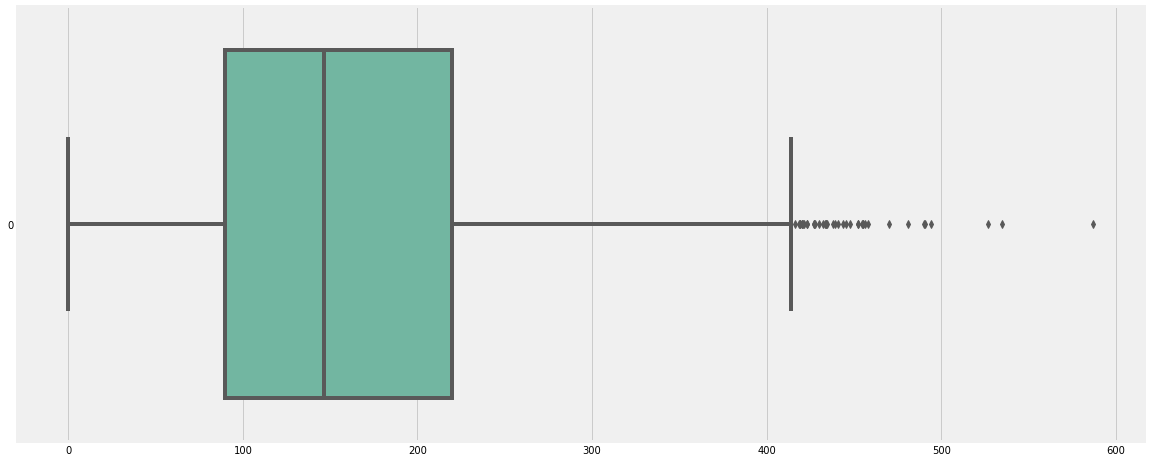

In [185]:
fig, axs = plt.subplots()
sns.boxplot(data=qseries1['AQI'],orient='h',palette="Set2")
plt.show()

In [186]:
q75, q25 = np.percentile(qseries1['AQI'], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
upper = q75 + (1.5*iqr)
print("Upper",upper)
lower = q75 - (1.5*iqr)
print("Lower",lower)


IQR 130.0
Upper 415.0
Lower 25.0


In [187]:
qseries1['AQI'] = qseries1['AQI'].clip(upper=upper)

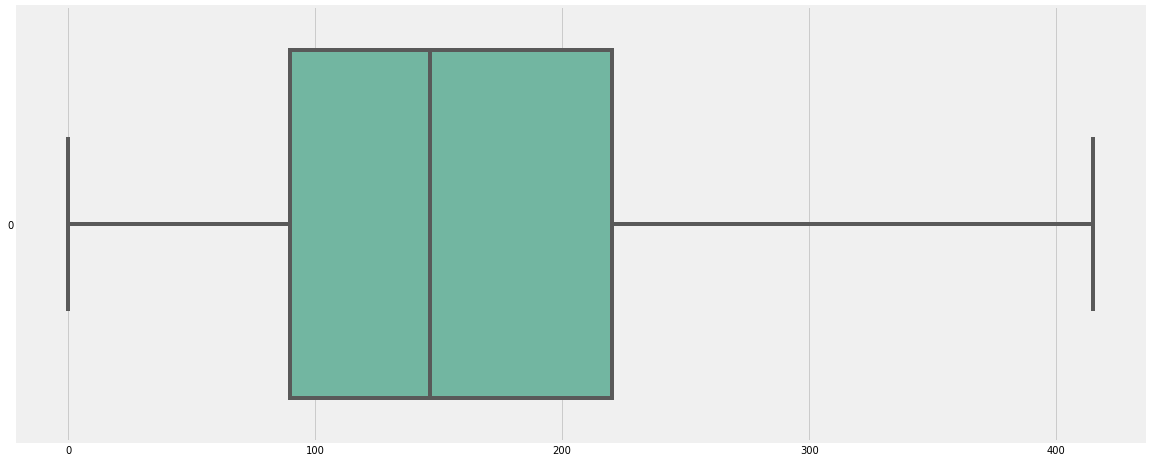

In [188]:
fig, axs = plt.subplots()
sns.boxplot(data=qseries1['AQI'],orient='h',palette="Set2")
plt.show()

In [189]:
qseries1 = qseries1['AQI'].resample('MS').mean()

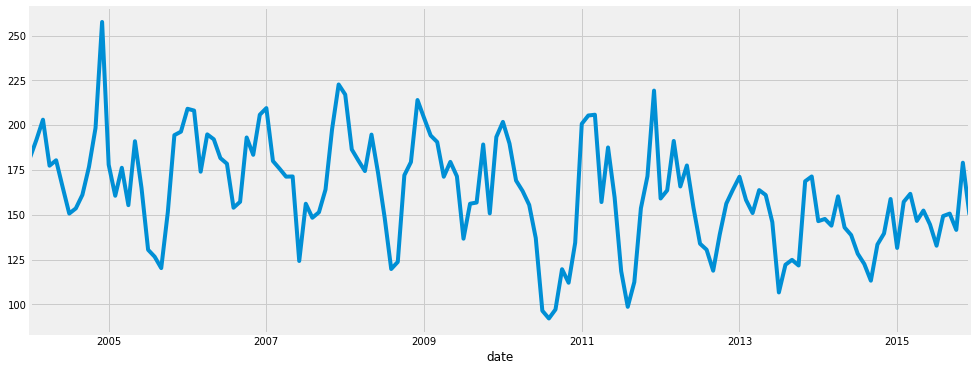

In [190]:
qseries1.plot(figsize=(15, 6))
plt.show()

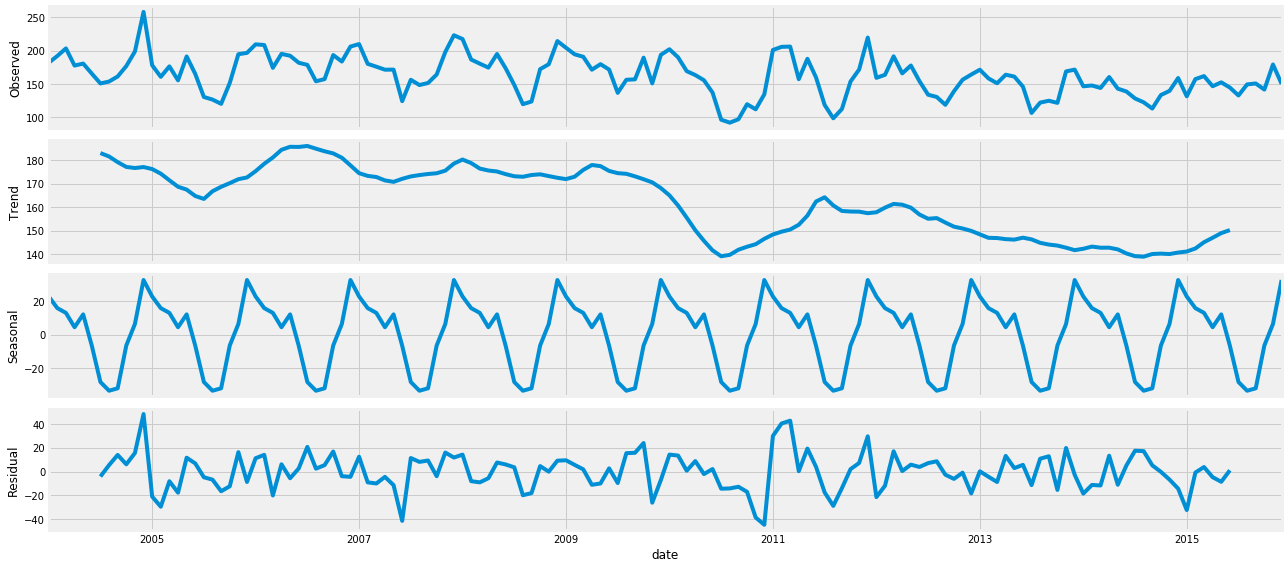

In [191]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(qseries1,model='additive')
fig = decomposition.plot()
plt.show()

In [192]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [193]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(qseries1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1868.0113045160122
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1583.1650970810779
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1236.5871332643683
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1082.2776889029344
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1241.6342293023379
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1175.1417989628096
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1096.5360567166226
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1084.7489555742502
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1685.5271823979028
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1442.6431941123806
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1204.5819053339987
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1047.6488224201519
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1219.4097287276318
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1207.4838135227187
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1075.880881286087
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1049.6033704640638
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1305.231006229913
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1179.63228816

In [194]:
mod = sm.tsa.statespace.SARIMAX(qseries1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4764      0.082      5.838      0.000       0.316       0.636
ma.L1         -1.0000     43.353     -0.023      0.982     -85.969      83.969
ma.S.L12      -0.8401      0.103     -8.130      0.000      -1.043      -0.638
sigma2       316.8052   1.37e+04      0.023      0.982   -2.66e+04    2.73e+04


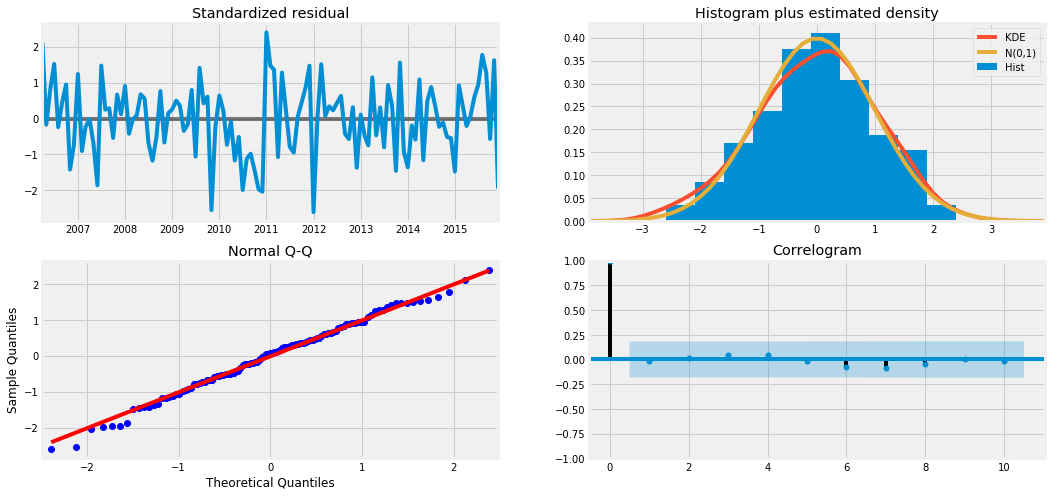

In [195]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

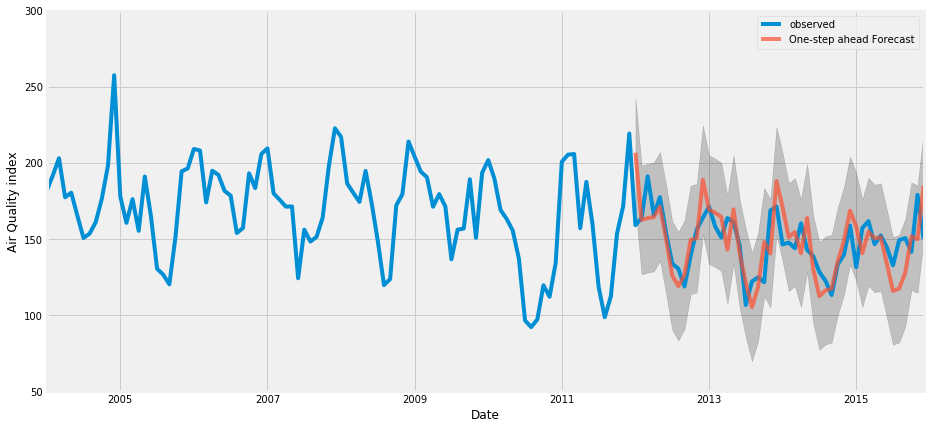

In [196]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = qseries1['2004':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Air Quality index')
plt.ylim(50,300)
plt.legend()
plt.show()

In [198]:
y_forecasted = pred.predicted_mean
y_truth = qseries1['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 301.53


In [199]:
def mean_absolute_percentage_error(y_forecasted , y_truth): 
    y_true, y_pred = np.array(y_forecasted), np.array(y_truth)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [200]:
p = mean_absolute_percentage_error(y_forecasted , y_truth)
print("The mean absolute percentage error is",p)

The mean absolute percentage error is 9.463053554668392


In [201]:
outputandhra = pd.DataFrame({'actual':y_truth,'predicted':y_forecasted})

In [203]:
outputandhra.tail()

,actual,predicted
date,,
2015-08-01,149.335306,117.457706
2015-09-01,150.698074,127.882913
2015-10-01,141.598630,151.860358
2015-11-01,179.105254,149.930238
2015-12-01,150.109595,185.188810


## Forecasting

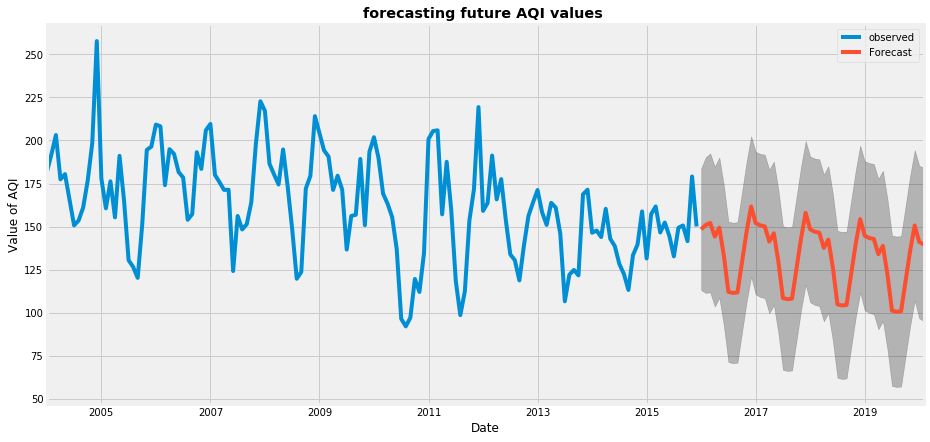

In [204]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = qseries1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title("forecasting future AQI values ",weight  = 'bold')
ax.set_xlabel('Date')
ax.set_ylabel('Value of AQI')
plt.legend()
plt.show()

In [208]:
print('Forecasted values of AQI values')
final=pd.DataFrame(pred_uc.predicted_mean)
final=final.reset_index()
final.columns = ['Date','AQI']
final

Forecasted values of AQI values


,Date,AQI
0,2016-01-01,148.456596
1,2016-02-01,150.914683
2,2016-03-01,152.176320
3,2016-04-01,144.223562
4,2016-05-01,149.440280
5,2016-06-01,133.208304
6,2016-07-01,112.161581
7,2016-08-01,111.558676
8,2016-09-01,111.851552
9,2016-10-01,129.525828
